<a id='step1'></a>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Илья, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы тебе использовать его для своего дальнейшего успеха) И очень здорово будет, если удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br></div>

#  Прогнозирование заказов такси

# Содержание

<br>[1.Подготовка](#step7)
<br>[2. Анализ](#step8)
<br>[3. Обучение](#step9)
<br>[4. Тестирование](#step10)
<br>[5. Общий вывод](#step11)
<br>[6. Чек-лист проверки](#step12)

<div style="border:solid green 2px; padding: 20px">
    
    
### Основная цель:<a class="tocSkip">        

  На __исторических данных__ о заказах такси в аэропортах, имеющихся у  компании __«Чётенькое такси»__, для __привленчения большего  количесва водителей__ в период __пиковой__ нагрузки, необходимо __спрогнозировать__ количество заказов на __следующий час__. Для  прогноза  __построим модель__  такого __предсказания__.<br>
  Значение полученной метрики __RMSE__ созданной модели, на тестовой выборке, не должно превышать  __48__.
     
    
### Задачи  проекта:<a class="tocSkip">

- 1   Загрузить данные и выполните их __ресемплирование по одному часу.__<br>
    
- 2 __Проанализируйте данные.__<br>
       
- 3 __Обучить разные модели__ с различными гиперпараметрами. Сделайть __тестовую выборку__ размером __10%__ от исходных данных.
    
- 4  Проверить данные на __тестовой выборке__.
    
- 5  Сделать __общий вывод__. 

</div>

<div style="border:solid green 2px; padding: 20px">
    
  


   
### Набор данных находится в файле:<a class="tocSkip">
- `/datasets/taxi.csv.` — исходный датасет.

   
    
### Описание данных <a class="tocSkip"> 
 
    
### Целевой признак: <a class="tocSkip">
-  __'num_orders'__ (количество заказов).     
    


</div>

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display
import seaborn as sn # подключение графической библиотеки seaborn
import matplotlib.pyplot as plt #импортируем библиотеку для графиков matplotlib 
import plotly.express as px# функция для создания таблиц и визуализации plotly

import warnings # игнор ошибок
warnings.simplefilter('ignore')# отменяет вывод таблицы предупреждения ошибки

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor # Импорт модель RandomForestRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor # Импорт модель DecisionTreeRegressor из библиотеки sklearn
from sklearn.linear_model import LinearRegression # Импорт модель LinearRegression из библиотеки sklearn
import lightgbm as lgb # Импорт Light GBM
import catboost as cb # Импорт CatBoost

from sklearn.model_selection import train_test_split # Импорт функцию train_test_split из библиотеки sklearn
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV # Импортируем функцию TimeSeriesSplit и GridSearchCV 
from statsmodels.tsa.seasonal import seasonal_decompose # метод разложение временных рядов
from sklearn.metrics import make_scorer # Импорт функцию make_scorer из библиотеки sklearn
from sklearn.model_selection import cross_val_score # Импорт функцию cross_val_score из библиотеки sklearn
from sklearn.metrics import mean_squared_error #Импортирую метрику mean_squared_error из библиотеки sklearn

import time # функция определения времени выполнения кода
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Время выполнения кода: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
start = time.time()

<a id='step7'></a>

## Подготовка
[&#10224;](#step1)

__Загрузка данных__

In [2]:
try: #конструкция try-except помогает выбрать работающий путь к исследуемым файлам
    df = pd.read_csv('/data_set/taxi.csv')#  /Работа - Локально/ 
   
except:
    df = pd.read_csv('/datasets/taxi.csv')# /Работа - сервер Яндекс/

In [3]:
df

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


__Еще раз загрузим данные со следующией предобработкой:__ parse_dates=[0] меняем формат индексируем по столбцу datetime, index_col=0 убираем столбец с первоначальной индексацией 

In [5]:
pd.set_option('display.float_format', '{:,.2f}'.format)# вывод без экспонентациальных форм и лишних запятых.
pd.set_option('display.max_columns', None) # вывод всех колонок датасета без урезания.


try: #конструкция try-except помогает выбрать работающий путь к исследуемым файлам
     # parse_dates=[0]  индексируем по столбцу дата, index_col=0 убираем столбец с индексацией
    df = pd.read_csv('/data_set/taxi.csv',parse_dates=[0],index_col=0)#  /Работа - Локально/ 
   
except:
    df = pd.read_csv('/datasets/taxi.csv',parse_dates=[0],index_col=0)# /Работа - сервер Яндекс/

__Общая информация о полученных данных__

In [6]:
l = [df]# с помощью цикла пройдемся по исследуемому датасету,выведем результаты  проверок.
for i in l:
    object_featur = i.shape[0:2]
    columns = ['строк',  'столбцов'] #Объеденим полученные результаты в таблицу
    object_featur = pd.DataFrame([object_featur], columns = columns)
    display("Общая информация по датафрейму:",object_featur,i,print("________________________________"))
    display(print("Типы данных:"),i.info())# смотрим на типы даннх
    display("Количество обнаруженных дубликатов:",i.duplicated().sum())# проверим полученные таблицы на дубликаты
    # код ниже находит и оформляет в таблицу пропущенные значения
    report = i.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / i.shape[0]*100).round(2)
    display('Пропущенных значений в таблице :',(report.sort_values(by = 'missing_values', ascending = False).reset_index()))

________________________________


'Общая информация по датафрейму:'

,строк,столбцов
0,26496,1


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


None

Типы данных:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

None

'Количество обнаруженных дубликатов:'

26415

'Пропущенных значений в таблице :'

,index,missing_values,% of total
0,num_orders,0,0.00


In [7]:
df = df.sort_index()  # строго ли увеличивается значение одного из столбцов 

print(df.index.is_monotonic)

True


In [8]:
df['num_orders'].max()

119

In [9]:
df['num_orders'].min()

0

In [10]:
df.query('num_orders == 0')

,num_orders
datetime,
2018-03-01 05:20:00,0
2018-03-01 05:40:00,0
2018-03-01 05:50:00,0
2018-03-01 06:00:00,0
2018-03-01 06:10:00,0
...,...
2018-08-24 05:50:00,0
2018-08-26 05:40:00,0
2018-08-29 07:00:00,0


In [11]:
df.describe()# сделаем общий цифровой анализ по столбцу num_orders

,num_orders
count,"26,496.00"
mean,14.07
std,9.21
min,0.00
25%,8.00
50%,13.00
75%,19.00
max,119.00


In [12]:
df.query('num_orders ==0').count()# смотрим количество 0 нулевых заказов 

num_orders    537
dtype: int64

Присутствуют аномально большое значение заказов __119__, сильно отличающееся от среднего ~ __14__, также имеются значения заказов  равных __0__

______________________________________________________________________________________________


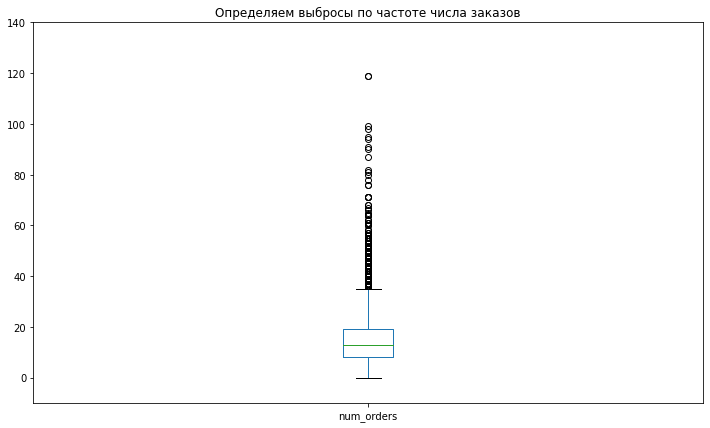

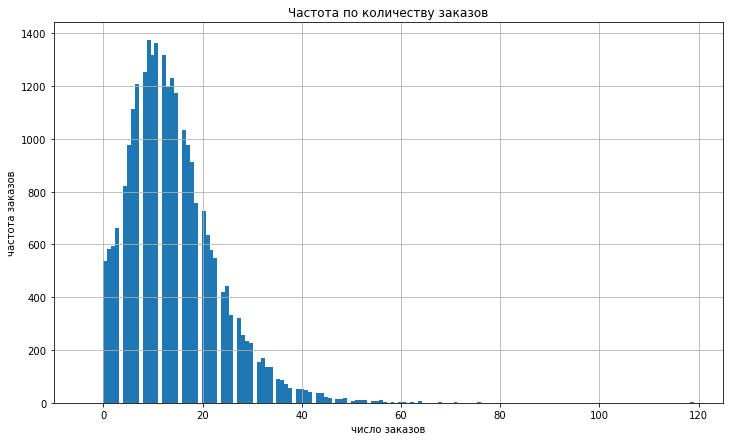

In [13]:
# Для оценивания выбросов строим боксплот
print('______________________________________________________________________________________________')
df.plot(y='num_orders', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте числа заказов')
plt.ylim(-10,140)
plt.xlim(0, 2) 
plt.show()


df['num_orders'].hist(bins= 150,figsize=(12, 7)).set_title('Частота по количеству заказов')
plt.xlim(-10,125)

plt.xlabel("число заказов")
plt.ylabel("частота заказов")
plt.show()

__Создадим функцию `remove`, в которой сможем убирать значения   Т.е значения не попадающие в интересующий нас интервал, и не актуальных  для исследования__

In [14]:
def remove_interference(d,column,little,big):     # аргументы -  датафрейм, столбец, диапазон значений от ittle до  big
    f = d.loc[(d[column] >= little ) &(d[column] <= big )]   
    print('Изначальный размер таблицы',d.shape)
    print('Размер после удаления выбросов',f.shape)
    return f

__Обратимся к функции `remove_interference` и удалим нестандартные значения в столбце registrationyear__

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
 После замечания ревьювера отменил удаление нестандартных значений
    
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
т.е. просто удалили данные?<br>
А если теперь проверить на монотонность, то по идее она будет нарушена. Во временных рядах  пропусков не должно быть!!!!<br>

Обычно, с временными рядами действуют чуть деликатнее.<br>
Если есть супер продажи, то ведь этому есть причины<br>
По хорошему, тут надо так: Выяснить, что это за дни. например понедельник. Взять несколько понедельников до и после этого значения и рассчитать медиану. Подставить вместо большого значения медиану, зафиксировать разницу. Тем самым решили две задачи:<br>
1) убрали выброс<br>
2) занесли в базу идентификатор выброса: дата - причина ( спросить у коммерсантов)<br>
    
    
Другая ситуация: А может быть , Вы обнаружили несколько пятниц с повышеннымс просом продаж. Скажем лето, белые ночи в Питере....<br> Тогда это не выброс, а реальная история продаж. И её нельзя вот так вот "убивать"<br>
    
Мне кажется, надо возвернуть данные на Родину)))<br>
C позиции бизнеса - это правильнее<br>


In [15]:
df_doubt = df.query('num_orders >= 40')
df_doubt

,num_orders
datetime,
2018-03-05 01:00:00,42
2018-03-24 00:50:00,56
2018-03-26 00:40:00,40
2018-03-26 01:40:00,40
2018-04-23 00:50:00,45
...,...
2018-08-31 17:50:00,44
2018-08-31 18:10:00,42
2018-08-31 22:20:00,48


In [16]:
df_doubt.value_counts()

num_orders
40            52
41            50
42            41
43            38
44            37
45            23
49            19
46            17
47            16
48            15
51            12
52            11
56            11
53            10
50             7
54             7
64             7
55             5
60             4
61             4
71             4
58             3
57             3
62             3
119            2
68             2
76             2
87             1
98             1
95             1
94             1
91             1
90             1
99             1
82             1
81             1
80             1
67             1
66             1
65             1
78             1
dtype: int64

In [17]:
df_doubt['2018-08-01 00:00:00':'2018-08-31 23:50:00']

,num_orders
datetime,
2018-08-01 00:40:00,40
2018-08-03 00:50:00,42
2018-08-03 01:00:00,41
2018-08-03 22:30:00,42
2018-08-04 02:00:00,46
...,...
2018-08-31 17:50:00,44
2018-08-31 18:10:00,42
2018-08-31 22:20:00,48


In [18]:
df.query('num_orders == 119')

,num_orders
datetime,
2018-08-13 02:20:00,119
2018-08-27 02:10:00,119


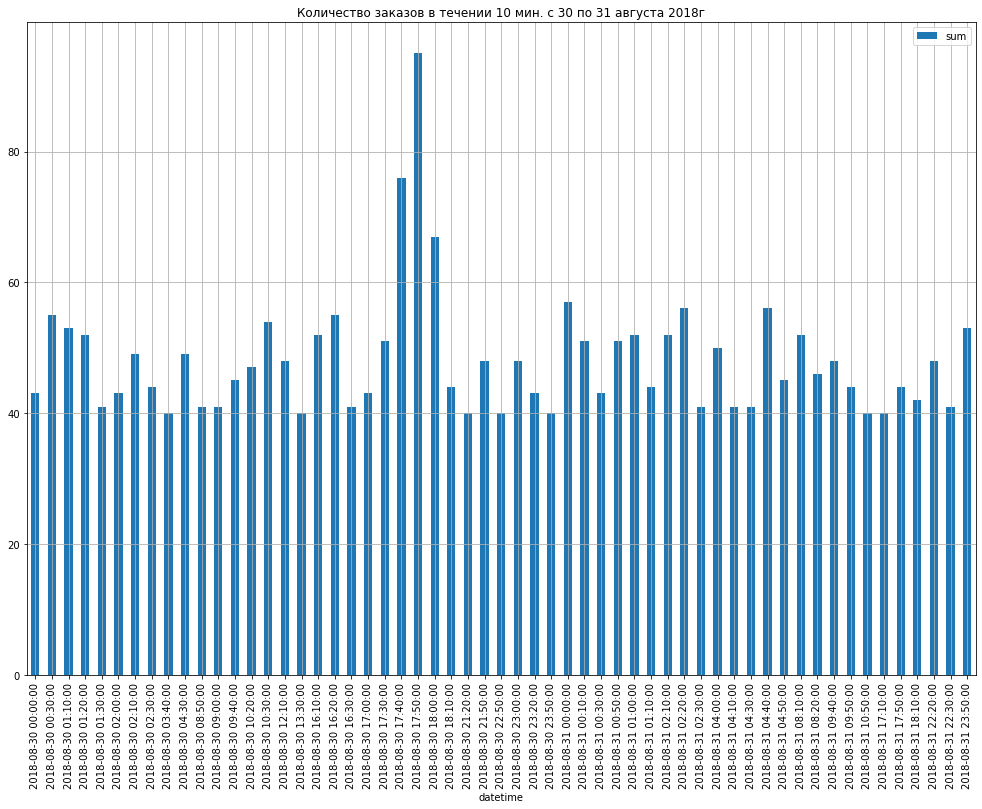

In [19]:
df_doubt['2018-08-30 00:00:00':'2018-08-31 23:50:00'].groupby('datetime')['num_orders'].agg(['sum']).plot(kind='bar',figsize =(17,12),grid=True,\
                                                     title='Количество заказов в течении 10 мин. с 30 по 31 августа 2018г')
plt.show()
# методом .groupby() группирум интересующий параметр по столбуц last_price, после методом plot стоим гистаграмы

In [20]:
df_doubt['2018-03-30 00:00:00':'2018-07-17 23:50:00'].count()

num_orders    57
dtype: int64

In [21]:
df_doubt['2018-08-30 00:00:00':'2018-08-31 23:50:00'].count()

num_orders    57
dtype: int64

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
  Ну да, дал лиху! Обчистил осчастливенный судьбой август) В нем, только за два дня больше заказов, которые > 40, чем за март,апрель,май,июнь и часть июля вместе взятых. Следовательно следую  указанию - возвернуть данные на Родину))) И почти с чистой совестью сказать языком заблукавшего - Ци руки ничёго не бралы)).&#128522;
    
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
    <p>😅</p>
</div>

______________________________________________________________________________________________


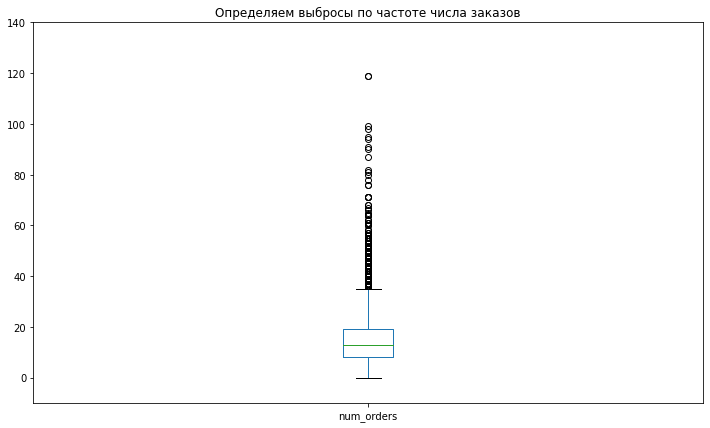

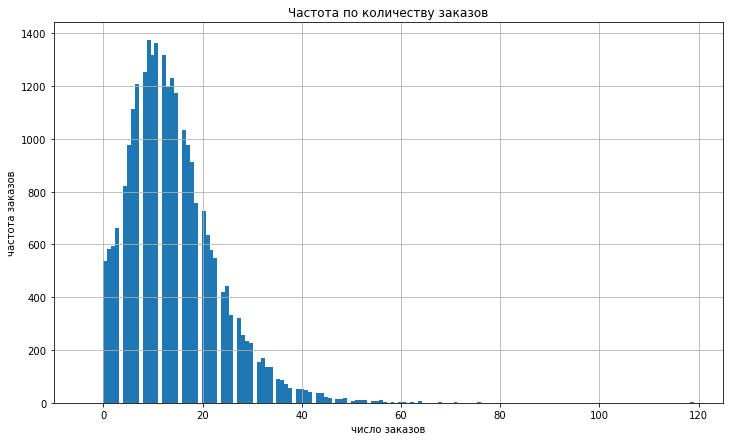

In [22]:
# Для оценивания выбросов строим боксплот
print('______________________________________________________________________________________________')
df.plot(y='num_orders', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте числа заказов')
plt.ylim(-10,140)
plt.xlim(0, 2) 
plt.show()


df['num_orders'].hist(bins= 150,figsize=(12, 7)).set_title('Частота по количеству заказов')
plt.xlim(-10,125)

plt.xlabel("число заказов")
plt.ylabel("частота заказов")
plt.show()

In [23]:
df.describe()

,num_orders
count,"26,496.00"
mean,14.07
std,9.21
min,0.00
25%,8.00
50%,13.00
75%,19.00
max,119.00


<div style="border:solid green 2px; padding: 20px">
    

**Вывод** <br>
    
На данном этапе загрузили датасет __df__ после предварительного ознакомления,  произвели предобработку в виде  индексации по  столбцу __datateme__. Также при помощи  __index_col=0_  убрали столбец с первоначальной индексацией. Получили df состоящий из __26496__ строк и  __1__ столбца. 
    
Предварительный анализ  датасета, не выявил пропусков в данных, но было обращено внимание на __573__ - __0__ (нулевых) значений заказов за 10 минут,  и сильно отличающиеся  от среднего значения ~ __14__ заказы  более __40 за 10__ минут. Нулевые значения заказов было решено не трогать, так как их не много, и это реальное отсутсвие заказов по болшей части в  ранние часы с 5-00 до 7-00. А вот значения  превышающие 40 заказов/час, было решено удалить. На следующем шаге произведем ресемплирование  __datetime__ по одному часу. Для анализа на наличие тренда и сезонности произведем декомпозицию методом __seasonal_decompose()__  
    
   
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>СУПЕР!!!!!!!!!!, данные на базе) <br>
    И ещё момент: когда еть тренд, то гистограмма и ящик с усами - так себе инструменты(((  (они не для этого)<br>
А вот если анализировать остатки, то тут да, очень и очень понадобятся эти графики.

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
Да, теперь уже понятно. Не годится здесь это творчество, переломал все временные ряды! Проигнорировал успешность августа. Не совсем понял, про  остатки - поясни какие остатки?
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>Остатки = факт минус прогноз. Т.е. ошибка прогноза. Обычно ещё смотрят три свойства:<br>
1) Нормальность (график гистограмма)<br>
2) Постоянство дисперсии (разброса) ошибки на всём протяжении модели (график скатерплот остаткков и предсказанных значений)<br>
3) автокореляция остатков (график автокорреляции)<br>
    
Если всё ок - говорят, что модель адекватна (не смотря на метрику).<br>
Если нарушен 1 и 3 свойство - модель можно улучшить.<br>
Если нарушен 2 модель использовать нельзя.<br>
    
Ниже на картинке постарался показать хорошие-плохие остатки)

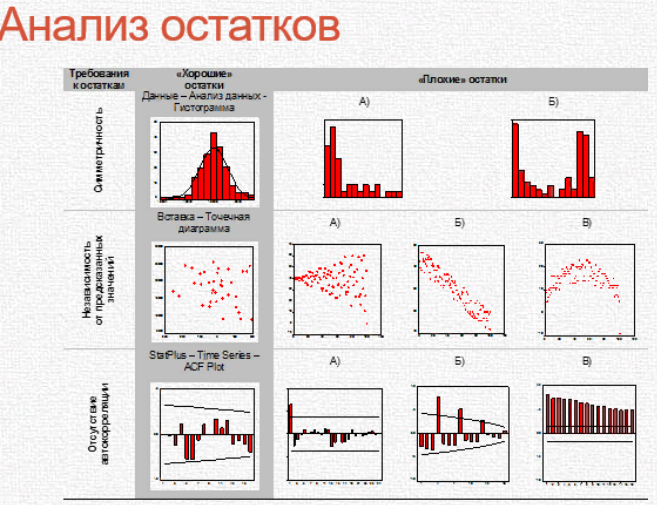

<a id='step8'></a>

## Анализ
[&#10224;](#step1)

__Выполняем  ресемплирование   `datetime` по одному часу.__

In [24]:
df.head(2)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14


In [25]:
df = df.resample('H').sum()


In [26]:
df.head(2)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85


In [27]:
print(df.index.min())
print(df.index.max())
print()
print('Время исследования',df.index.max() - df.index.min())
print()
print('Минимальное количество заказов',df['num_orders'].min(),'час')
print('Максимальное количество заказов',df['num_orders'].max(),'час')

2018-03-01 00:00:00
2018-08-31 23:00:00

Время исследования 183 days 23:00:00

Минимальное количество заказов 0 час
Максимальное количество заказов 462 час


 Выберем один день 31 августа  и проанализируем, что происходит с заказами в течении суток.

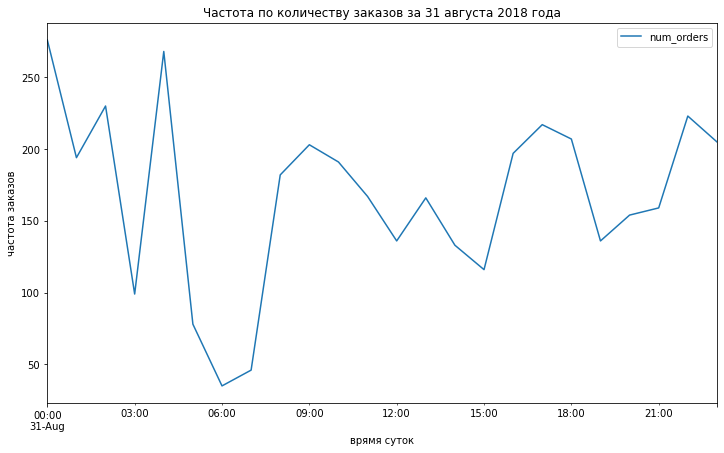

In [28]:
df['2018-08-31'].plot(figsize=(12, 7)).set_title('Частота по количеству заказов за 31 августа 2018 года')


plt.xlabel("врямя суток")
plt.ylabel("частота заказов")
plt.show()




__Просматривается явная зависимость количества заказов от времени суток__ Ночью с 3 до 7 сильный спад, днем значитьельное увеличение заказов с 9 до 18

Посмотрим, есть ли зависимоть от дня недели, для этого проанализируем более длинный период

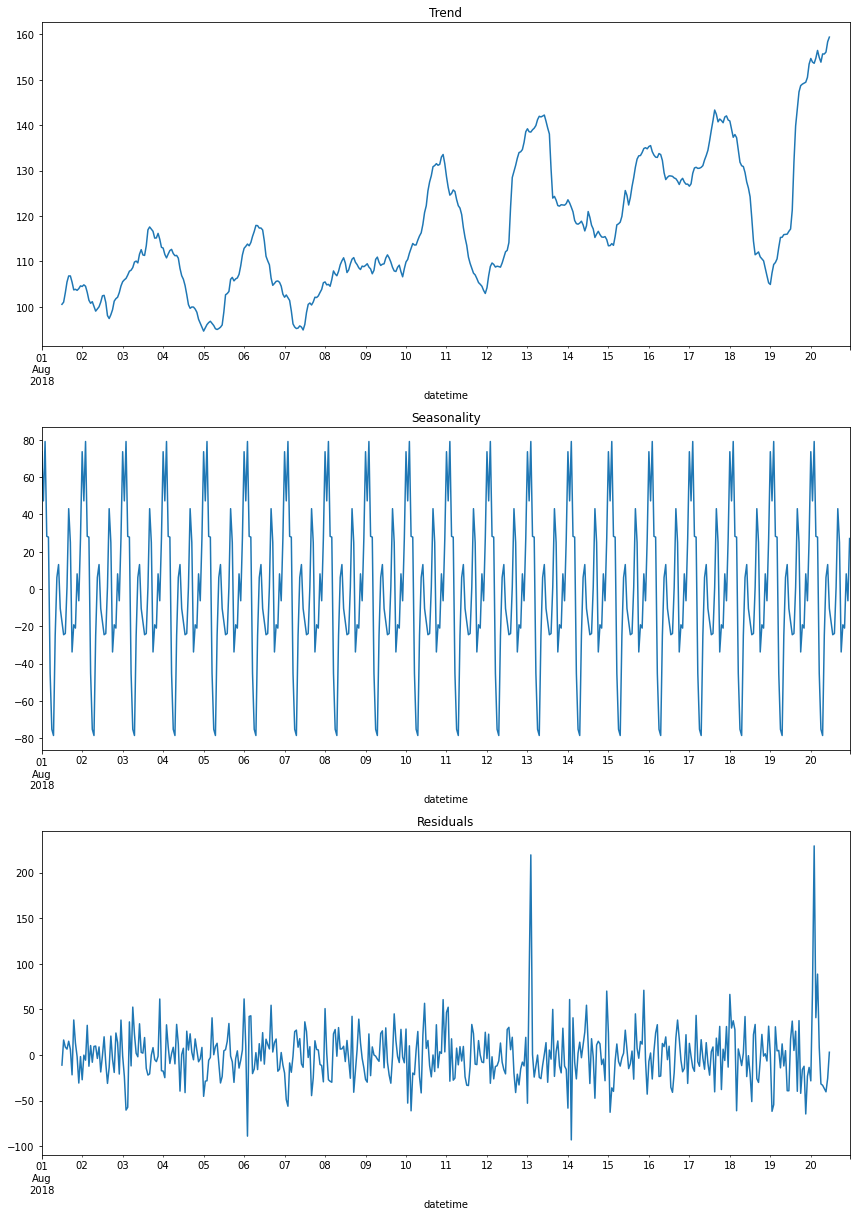

In [29]:
df_month = df['2018-08-01':'2018-08-20']

decomposed_cut = seasonal_decompose(df_month)

plt.figure(figsize=(12, 17))
plt.subplot(311)
decomposed_cut.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_cut.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_cut.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Здесь на __Trende__ видно, что количество заказов значительно __увеличивается__ с наступлением выходных дней с __пятницы по вечер воскресенья__. Можно предположить, что __праздничные дни__, также способствуют __увеличению__ количества заказов такси. __Seasonality__ также  подтверждает о наличии сезонности от времени суток - __ночью просматривается спад заказов__. 

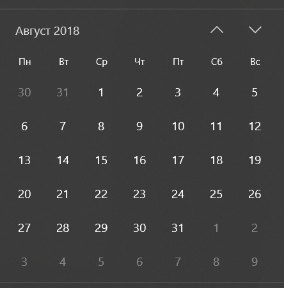

Сделать анализ, есть ли сезонность в течении года, из за неполноты выборки, мы не можем, но ресемплировав столбец __datetime__ по __одному дню__   и построив график, можем проанализировать о наличии трендов (возрастающих, убывающих), либо об отсутствии таковых.

,num_orders
datetime,
2018-03-01,1364
2018-03-02,1506
2018-03-03,1290


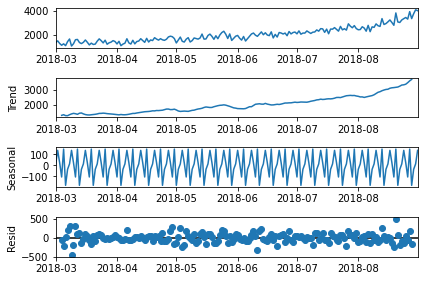

In [30]:
df_day = df.resample('D').sum() #ресемплировав столбец __datetime_ по количеству заказов за один день
  
decomposed = seasonal_decompose(df_day) # методом seasonal_decompose() посмотрим на Trend Seasonal Resid
decomposed.plot()  
df_day.head(3)

In [31]:
# добавим столбцы со средним значением и стандартным отклонением. делаем смещение со значением 5
df_day['std'] = df_day['num_orders'].rolling(5).std()
df_day['mean'] = df_day['num_orders'].rolling(5).mean()


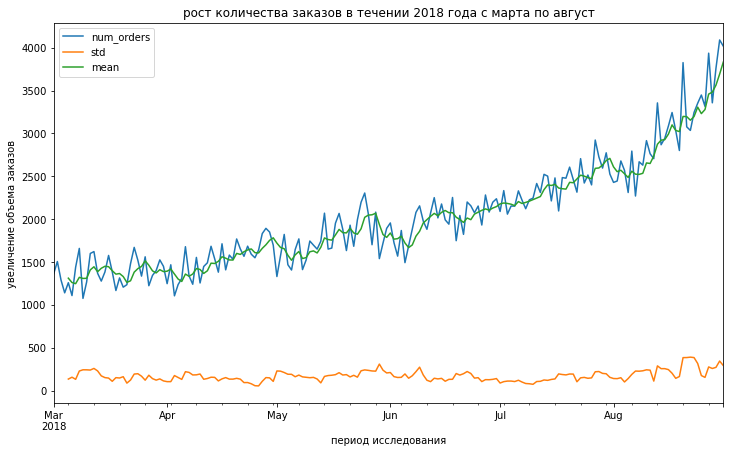

In [32]:
df_day.plot(figsize=(12, 7)).set_title('рост количества заказов в течении 2018 года с марта по август')


plt.xlabel("период исследования")
plt.ylabel("увеличение объема заказов")
plt.show()

Ресемплировав столбец __datetime__ по одному дню и построив на  график, можно наблюдать возрастающий с марта по авгут тренд __увеличения количества заказов такси__. Как и предполагали ранее, из-за __неполноты данных__, мы не __можем определить__, есть ли сезонность в __годовом периоде__. Можно только __предположить__, что осенью и зимой количество заказов __может упать__, так как люди, в холодное время года, менее склонны к прогулкам и путешествиям. Также основной период отпусков приходится на теплое время года. 

In [33]:
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


<div style="border:solid green 2px; padding: 20px">
    

**Вывод** <br>
На этапе анализа, был произведено ресемплирование __datetime__ по __одному__ часу, сделаны временные срезы, и для определения тренда и сезонности произведена декомпозиция временных рядов. Для дальнейшего обучения моделей был получен df состоящий из __4416__ строк и __1__ столбца     
    

1. Проанализировав происходящее с заказами такси за __1__ одни сутки, была обнаружена __явная зависимость__ (сезонность) количества заказов  от __времени суток__. Так __ночью__ наблюдается __сильный спад__ заказов с 3-00 до 7-00. __Днем__ же наоборот, наблюдается __значительное увеличение__ заказов с 9-00 до 18-00
    
 
2. Исследовав более длительный период времени __20 дней__ можно наблюдать  зависимость  количества заказов (сезонность) от дня недели. Так наступление выходных с __пятницы по вечер воскресенья__ показывает на графике значительное __увеличения  заказов__ такси, по сравнению с будними днями. По всей вероятности __праздничные дни__, аналогично выходным, __способствуют увеличению__ количества заказов такси.<br>
    __Seasonality__ также подтверждает о наличии сезонности от времени суток - __ночью__ просматривается __спад__ заказов.  
    
    
3. Ресемплировав столбец __datetime__ по одному дню и построив на график, можно наблюдать возрастающий с марта по авгут __тренд__  увеличения  заказов такси в течени __1__-го часа. Можно предположить, что это удачная маркетинговая кампания  компании __«Чётенькое такси»__, но учитывая, что данные полученной выборки предоставлены только с марта по август, а это самое востребованное время для отпусков и путешествий (следует также помнить, что наша выборка собрана из заказав такси в аэропортах), здесть напрашивается вывод, что это только сезонный рост количесва заказов. В пользу этого довода, также можно утверждать, что в холодное время года, люли менне склонны к прогулкам и путешествиям. Осенью и зимой, по вышеупомянутым причинам, количество заказов может упать.<br>
    Так из-за неполноты выборки, мы не можем определить, есть ли сезонность в годовом периоде.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>
ПРОСТО КЛАССНО!!!!!! Исследование - понятно.<font color='green'><br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - важный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это помогает сделать предвариетльные выводы<br>
    
Резюмирую сказанное тобой:<br>
В реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность -  данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности может и хватить.
</font></p></div>

<a id='step9'></a>

## Обучение
[&#10224;](#step1)

<a id='step3'></a>

 <div style="border:solid green 2px; padding: 20px">
    
**На данном этапе** <br>
 
Обучим четыре модели ориентируясь на метрику __RMSE__. В качестве моделей используем  Линейную регрессию, Случайный лес, LGBMRegressor, CatBoostRegressor.    
    
    
 __Исследуем качество разных моделей__, меняя гиперпараметры. Кратко опишем выводы исследования. Выберем лучщие показатели, для дальнейшей проверки на тестовой выборке. Перед обучением моделей в обучающей и тестовой выборках выделем __общие__  и __целевые__ признаки. Создадим функцию расчета   __RMSE__

### Построим модели  :<a class="tocSkip">

-  __Линейная регрессия__ -  [LinearRegression](#step2)    
-  __Cлучайный лес__    - [RandomForestClassifier](#step4)
-  __LGBMRegressor__  - [LGBMRegressor](#step5)
-  __CatBoostRegressor__  - [CatBoostRegressor](#step6)
   
</div>

Создадим функцию  __make_features__  через которую добавим дополнительные признаки в наш датасет df.

In [34]:
#Объявим функцию для создания признаков
def make_features(df, max_lag, rolling_mean_size):
    #df['std'] = df['num_orders'].rolling(5).std() # создание столбца в df  со значение std и сдвигаем показания на 5 строк вниз
    #df['mean'] = df['num_orders'].rolling(5).mean()
    #df['median'] = df['num_orders'].rolling(5).median()  
    df['hour'] = df.index.hour
    #df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    #df['month'] = df.index.month
    #df['year'] = df.index.year
        
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
На мой взгляд: не все факторы подходят, чисто логически. Выскажу свою позицию:<br><br>

1) Фактор год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Фактор месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизоно прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.<br>
3) Фактор день: НЕТ, также не подходит, будет просто последовательность чисел<br>
4) Фактор день недели: ДА, т.к. у нас есть недельная сезонность<br>
5) Фактор час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Факто lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Фактор rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда <br>

Как ты думаешь?</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
Да, чего тут думать, все верно. Я еще когда на график  важности смотрел - увидел  бесполезность этих признаков, но не убрал.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
    <p>👍👍</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p> Сразу пару строк о факторе месяц:<br>
Если нам брать горизонт прогноза месяц или два , то фактор месяц - очень важне  это факт. А если брать горизонт прогноза несколько часов, то фактор времени года - на таком отрезке времени и не заметен. К тому же, он уже присутствует в тренде (скользящем среднем). Т.е. его участие локально как бы и есть.<br>

То, что сейчас месяц может увеличивать точность - это случайно. Он ведь представлен как числа от 1 до 8 и ещё есть тренд, как раз. Т.е. произошло наложение тренда и номера месяца. А вот если продажи буду уходить вниз (или перестанут расти), а мы будем продолжать пользовться моделью, то модель будет предсказывать рост на сентябрь (цифра 9), на октябпрь (цифра 10)... т.е. чиссто числовая тенденция)<br>
    
Поэтому, рекомендация для будущих проетов на эту тему:<br>
Учитывать горизонт прогноза: если задача стоит среднесрочного и долгосрочного прогноза, то месяц нам в помощь (при этом данных должно быть не меннее 2-х / 3-х лет). Если задача краткосрочного прогнозирования - месяц не надо использовать, он уже в тренде заложен.</div>

In [35]:
#Применим функцию создания признаков
make_features(df,2, 24)

In [36]:
df.head(25)

,num_orders,hour,dayofweek,lag_1,lag_2,rolling_mean
datetime,,,,,,
2018-03-01 00:00:00,124,0,3,nan,nan,nan
2018-03-01 01:00:00,85,1,3,124.00,nan,nan
2018-03-01 02:00:00,71,2,3,85.00,124.00,nan
2018-03-01 03:00:00,66,3,3,71.00,85.00,nan
2018-03-01 04:00:00,43,4,3,66.00,71.00,nan
2018-03-01 05:00:00,6,5,3,43.00,66.00,nan
2018-03-01 06:00:00,12,6,3,6.00,43.00,nan
2018-03-01 07:00:00,15,7,3,12.00,6.00,nan
2018-03-01 08:00:00,34,8,3,15.00,12.00,nan


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Пару строк по фактору лаг и скользящее среднее:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>
    
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>
    
Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
В принципе, если я правильно понял, то после добавления  рекомендованных   признаков  hour,   удаления day, month, yer и изменения параметров на лаг (максимум 2), а скользящее среднее = 24 (среднее за сутки), допустимое на тесте по условию  RSME получаем на модели  CatBoostRegressor.<br>
    Чтобы получить прогноз 48  на других моделях необходимо сильно изменять  лаг, как вариант пробовал такие параметры 
    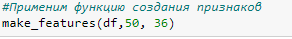
     получил следующие результаты
    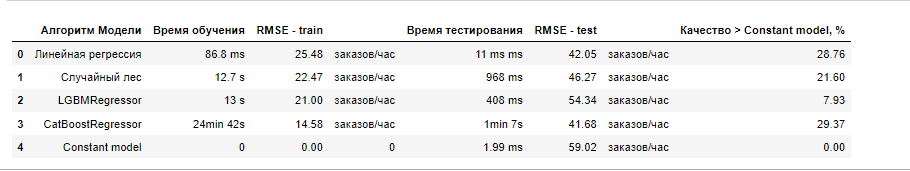
    Долго учится CatBoostRegressor, и LGBMRegressor не справляется с заданием
</div>

In [37]:
# Устраняем пропуски данных, возникшие в результате работы функции make_features()
df = df.dropna() # удаление пропущенных  значений
#df = df.bfill().ffill() # замена пропусков ближайшими значениями
#df = df.fillna(0) # замена пропусков  значением 0

__Выделим признаки, разобъем на обучающие и тренировочные выборки.__

In [38]:
# Разбиваем методом train_test_split на   тренировочные и тестовые выборки
train, test = train_test_split(df, shuffle=False, test_size=0.1)


features_train = train.drop(['num_orders'], axis=1)# Общие признаки
target_train = train['num_orders']# Целевой признак
features_test = test.drop(['num_orders'],axis=1 )# Общие признаки test выборки
target_test = test['num_orders']# Целевой признак test выборки



<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ОК</p>
</div>

__Посмотрим как разделились выборки__

In [39]:
# Проверим, корректно ли поделились наши выборки
def percent(df_1,df_2):
    selection_1 = df_1.shape[0]/df.shape[0]
    selection_2 = df_2.shape[0]/df.shape[0]
    print('{:.0%} {:.0%}'.format(selection_1,selection_2))
percent(features_train,features_test)

90% 10%


__Проверим размеры полученных выборок__

In [40]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00


In [41]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3952, 5)
(440, 5)
(3952,)
(440,)


In [42]:
# Создадим функцию для расчета метрики RMSE
def RMSE(target, predict):
    return (mean_squared_error(target, predict))**0.5
   
#С помощию функции make_scorer создаю метрику RMSE
RMSE_score = make_scorer(RMSE, greater_is_better=False)

__Проверим предсказание количества заказов на следующий час при помощи  различных моделей__

В связи с тем, что мы работаем с временным рядом, нельзя применять кросс-валидацию в привычном виде для подбора гиперпараметров моделей с помощью GridSearchCV. Поэтому применим функцию TimeSeriesSplit().

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>👍</p>
</div>

<a id='step2'></a>

__Линейная регрессия - LinearRegression()__<br>
[&#10224;](#step3)

In [43]:
%%time 
# %%time посмотрим время  обучения
my_cv = TimeSeriesSplit(n_splits=3).split(features_train) #  применим функцию TimeSeriesSplit()
# Объявим модель Линейной регрессии
regression_model = LinearRegression()
# Обучим модель
regression_model.fit(features_train, target_train)
#  С помощью кросс-валидации определим RMSE модели 
regression_cv_score = pd.Series(cross_val_score(regression_model,features_train,\
                                                target_train,scoring=RMSE_score,cv=my_cv)).mean()*(-1)
print('Среднее качество модели линейной регрессии :', round(regression_cv_score,2) )


Среднее качество модели линейной регрессии : 32.8
Wall time: 31.2 ms


<a id='step4'></a>

__Cлучайный лес - RandomForestClassifier__<br>
[&#10224;](#step3)

In [44]:
%%time 
# %%time посмотрим время  обучения
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
# Объявим модель Случайного леса
forest = RandomForestRegressor()
# Определим словарь с набором параметров
forest_parametrs = { 'n_estimators': range(5, 15, 5),
                     'max_depth': range(1, 6, 2),
                     'min_samples_leaf': range(1,4),
                     'min_samples_split': range(2,6,2) }

# Применим  GridSearchCV с кросс-валидацией
forest_model = GridSearchCV(forest, forest_parametrs, scoring=RMSE_score, cv=my_cv )
forest_model.fit(features_train, target_train)

Wall time: 2.75 s


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x0000023B0CA623C0>,
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 6, 2),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': range(5, 15, 5)},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [45]:
%%time

# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
forest_params = forest_model.best_params_
forest_score = forest_model.score(features_train, target_train) * (-1)
print(forest_params)
print('Качество модели Cлучайный лес ', round(forest_score,2))
print('_______________')


{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10}
Качество модели Cлучайный лес  24.2
_______________
Wall time: 14.1 ms


<a id='step5'></a>

<a id='step5'></a>

__LGBMRegressor__<br>
[&#10224;](#step3)

In [46]:
%%time 
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
# Объявим модель LGBMRegressor
lg = lgb.LGBMRegressor()
# Создаем словарь с набором параметров
lg_parametrs = {"max_depth": [25, 50, 75],
               "learning_rate" : [0.01, 0.1],
               "num_leaves": [200, 500, 1200],
               "n_estimators": range (5, 15, 5)
             }
# Применим  GridSearchCV с кросс-валидацией
lg_model = GridSearchCV(lg, lg_parametrs, scoring=RMSE_score, cv=my_cv )
lg_model.fit(features_train, target_train)

Wall time: 5.25 s


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x0000023B103E5660>,
             estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [25, 50, 75],
                         'n_estimators': range(5, 15, 5),
                         'num_leaves': [200, 500, 1200]},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [47]:
%%time 
# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
lg_params = lg_model.best_params_
lg_score = lg_model.score(features_train, target_train) * (-1)
print(lg_params)
print('Качество модели LGBMRegressor',round(lg_score,2))
print('_______________')

{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 10, 'num_leaves': 200}
Качество модели LGBMRegressor 23.28
_______________
Wall time: 21.9 ms


<a id='step6'></a>

__CatBoostRegressor__<br>
[&#10224;](#step3)

In [48]:
%%time
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
# Объявим модель CatBoostRegressor
cb = cb.CatBoostRegressor()
# Словарь с набором параметров
cb_parametrs = {"iterations": [100],
                "depth": range(8, 16, 2),
                "learning_rate" : [0.15]
             }
# Применяем GridSearchCV с кросс-валидацией
cb_model = GridSearchCV(cb, cb_parametrs, scoring=RMSE_score, cv=my_cv )
cb_model.fit(features_train, target_train)

0:	learn: 27.4728264	total: 141ms	remaining: 14s
1:	learn: 25.7847733	total: 145ms	remaining: 7.11s
2:	learn: 24.6548460	total: 149ms	remaining: 4.82s
3:	learn: 23.5020908	total: 154ms	remaining: 3.7s
4:	learn: 22.4890238	total: 159ms	remaining: 3.02s
5:	learn: 21.6983729	total: 163ms	remaining: 2.56s
6:	learn: 21.1861242	total: 167ms	remaining: 2.22s
7:	learn: 20.5844070	total: 170ms	remaining: 1.95s
8:	learn: 20.1480298	total: 174ms	remaining: 1.76s
9:	learn: 19.7759734	total: 178ms	remaining: 1.6s
10:	learn: 19.3198898	total: 182ms	remaining: 1.47s
11:	learn: 19.1014273	total: 187ms	remaining: 1.37s
12:	learn: 18.7644247	total: 191ms	remaining: 1.28s
13:	learn: 18.5322277	total: 195ms	remaining: 1.2s
14:	learn: 18.2672705	total: 199ms	remaining: 1.13s
15:	learn: 18.0184215	total: 203ms	remaining: 1.06s
16:	learn: 17.8005920	total: 207ms	remaining: 1.01s
17:	learn: 17.6580092	total: 211ms	remaining: 962ms
18:	learn: 17.3960967	total: 215ms	remaining: 918ms
19:	learn: 17.2418113	total

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x0000023B103E5A50>,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000023B10400D00>,
             param_grid={'depth': range(8, 16, 2), 'iterations': [100],
                         'learning_rate': [0.15]},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [49]:
%%time 
# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
cb_params = cb_model.best_params_
cb_score = cb_model.score(features_train, target_train) * (-1)
print(cb_params)
print('Качество модели CatBoostRegressor',round(cb_score,2))
print('_______________')

{'depth': 8, 'iterations': 100, 'learning_rate': 0.15}
Качество модели CatBoostRegressor 18.08
_______________
Wall time: 7.98 ms


__Соберем полученные результаты в таблицу___

In [69]:
columns = ['Алгоритм Модели', 'Время обучения', 'RMSE - train','']

line = ['Линейная регрессия','31.2 ms', round(regression_cv_score,2),'заказов/час']

forest = ['Случайный лес','2.75 s', round(forest_score,2),'заказов/час']

LGBMRegressor = ['LGBMRegressor','5.25 s',round(lg_score,2),'заказов/час']

CatBoostRegressor = ['CatBoostRegressor','1min 40s', round(cb_score,2),'заказов/час']

table_result = pd.DataFrame([line, forest, LGBMRegressor, CatBoostRegressor ], columns = columns)
display(table_result)

,Алгоритм Модели,Время обучения,RMSE - train,
0,Линейная регрессия,31.2 ms,32.80,заказов/час
1,Случайный лес,2.75 s,24.20,заказов/час
2,LGBMRegressor,5.25 s,23.28,заказов/час
3,CatBoostRegressor,1min 40s,18.08,заказов/час


<div style="border:solid green 2px; padding: 20px">
    

**Вывод** <br>

На этапе __обучения моделей__, для увеличения нашего датасета __df__ дополнительными признаками, создали функцию  ___make_features___. Удалили образовавшиеся пропуски, после добавления  признаков функцией make_features. Также для расчета метрики  RMSE  объявили функцию  __RMSE__. Методом __train_test_split__ разделили наш датасет df на   тренировочные и тестовые выборки.     Обучили 4-е модели (`Линейная регрессия, Случайный лес, LGBMRegressor, CatBoostRegressor`) на тренировочной выборке. Здесь, лучшую метрику __RMSE__ показала модель __CatBoostRegressor__  и составила __18.08__	заказов/час
   
</div>

На данном этапе подобраны гипермараметры для каждой модели.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ОК, с модельной частью есть контакт)</p>
</div>

<a id='step10'></a>

## Тестирование
[&#10224;](#step1)

Проведем тестирование моделей с подобранными гиперпараметрами.

In [51]:
#  функция для построения сравнительных графиков "целевой признак - предсказание модели"
def graphicaizer(predictions):
    model_data = pd.DataFrame({"target":target_test, "predict":predictions})
    model_data.plot(figsize=(18, 6))
    model_data['2018-08-29':'2018-08-31'].plot(figsize=(18, 6))

In [52]:
# функция для построения графика важности признаков
def feature_importance_hist(model, features_train):
    importances = list(model.feature_importances_)
    names_indices = features_train.columns
    not_null_importances = []
    not_null_indices = []

    for i in importances:
        if i>=0:
            not_null_importances.append(i)
            not_null_indices.append(names_indices[importances.index(i)])
    
    plt.figure(figsize=(15, 11))
    plt.title("Feature importances")
 
    plt.bar(range(len(not_null_importances)), not_null_importances, color="g")
    plt.xticks(range(len(importances)), not_null_indices, rotation=90)
 
    plt.tight_layout()
    plt.xlim([-1, len(not_null_importances)])
    plt.show()

`Test`__Линейная регрессия - LinearRegression()__<br>

In [53]:
%%time

regression_model_predictions = regression_model.predict(features_test)

#Определяю метрику RMSE
regression_RMSE = round(RMSE(target_test, regression_model_predictions), 3)
print('RMSE модели Линейной регрессии:', regression_RMSE)

RMSE модели Линейной регрессии: 51.296
Wall time: 4.99 ms


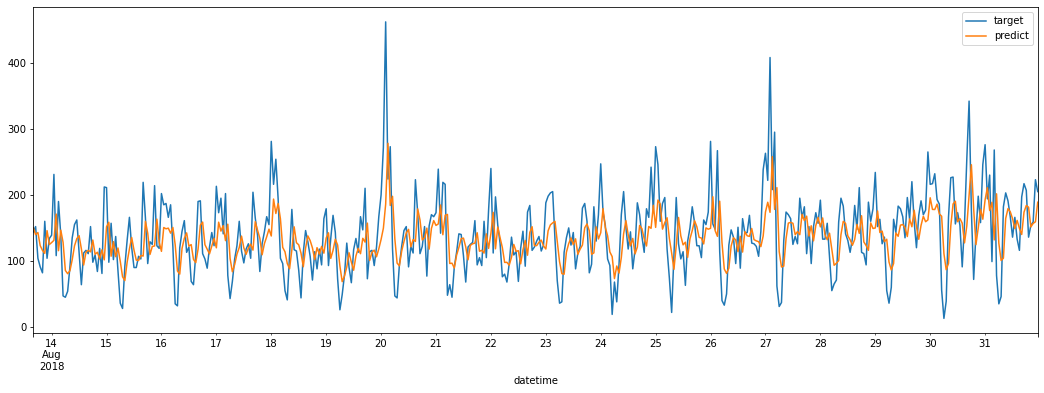

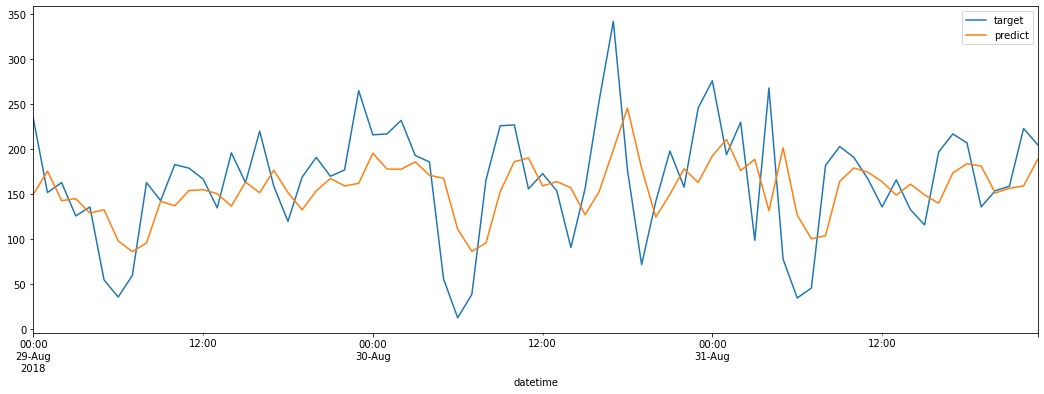

In [54]:
# строим сравнительный график "целевой признак - предсказание модели" для regression_model_predictions
graphicaizer(regression_model_predictions)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Глядя на график, а также добавляя отдельный анализ остатков, можно будет хорошо порабоать над улучшением модели..<br>

`Test`__Cлучайный лес - RandomForestClassifier__<br>

In [55]:
%%time

#Обучим модель на оптимальных гиперпараметрах
forest_model = RandomForestRegressor(random_state=42,
                                     max_depth=forest_params['max_depth'],
                                     min_samples_leaf = forest_params['min_samples_leaf'],
                                     min_samples_split = forest_params['min_samples_split'],
                                     n_estimators = forest_params['n_estimators'])

forest_model.fit(features_train, target_train)


forest_model_predictions = forest_model.predict(features_test)

#Определяю метрику RMSE
forest_RMSE = round(RMSE(target_test, forest_model_predictions), 3)
print('RMSE модели Случайного леса:', forest_RMSE)

RMSE модели Случайного леса: 52.046
Wall time: 68.9 ms


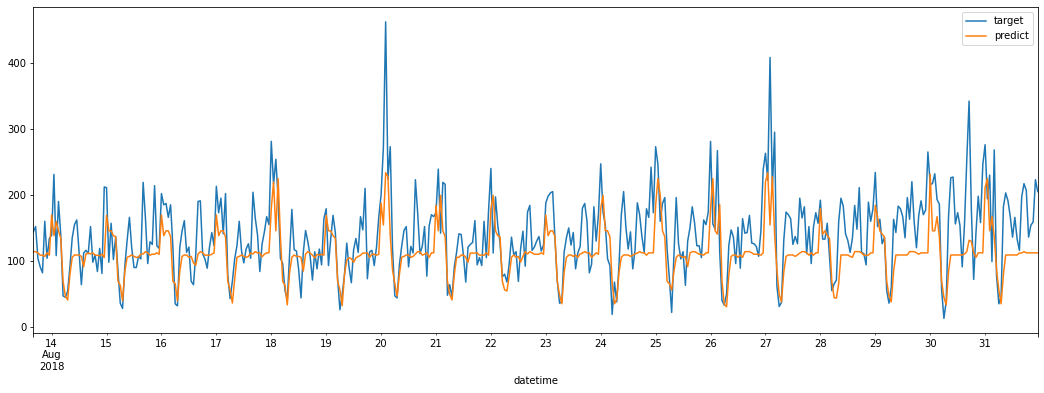

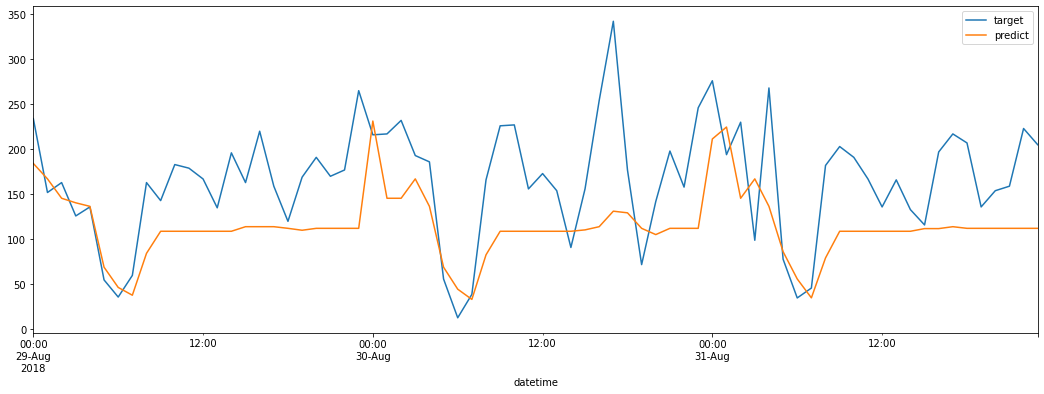

In [56]:
# строим сравнительный график "целевой признак - предсказание модели" для forest_model_predictions
graphicaizer(forest_model_predictions)

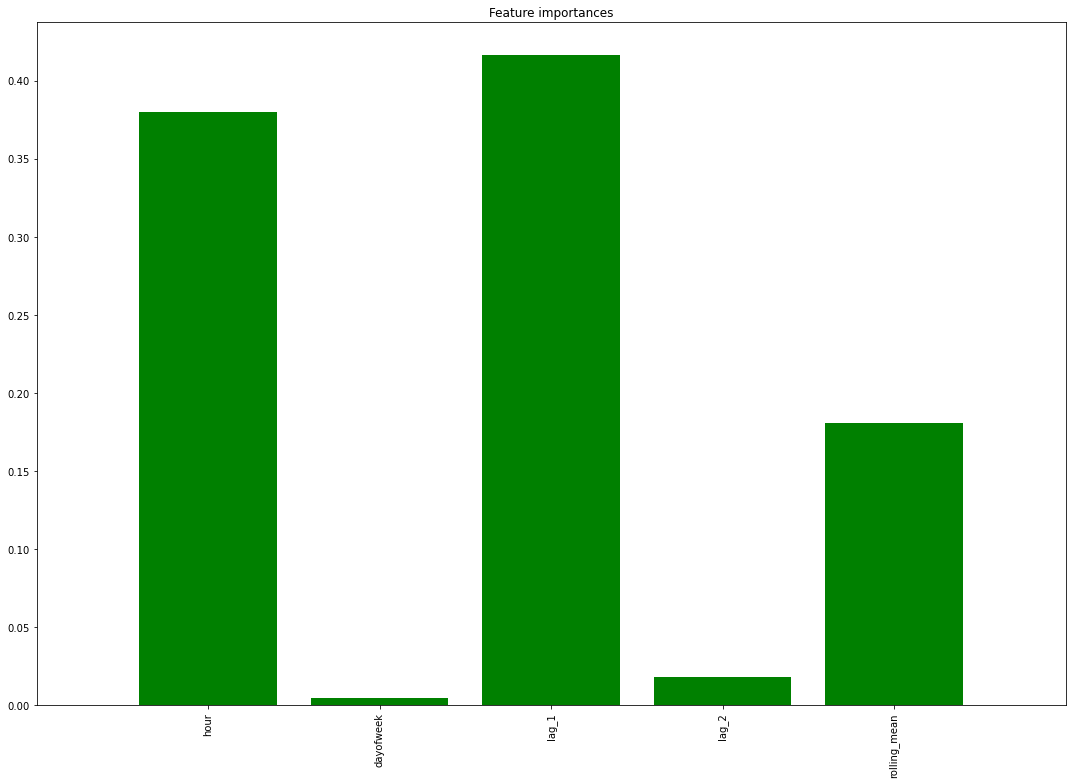

In [57]:
# график важности признаков модели forest_model
feature_importance_hist(forest_model, features_train)

`Test`__LGBMRegressor__<br>

In [58]:
%%time
#Обучим модель на оптимальных гиперпараметрах
lg_model = lgb.LGBMRegressor(max_depth= lg_params['max_depth'],
                             learning_rate = lg_params['learning_rate'],
                             num_leaves = lg_params['num_leaves'],
                             n_estimators = lg_params['n_estimators'])

lg_model.fit(features_train, target_train)
lg_model_predictions = lg_model.predict(features_test)

#Определяю метрику RMSE
lg_RMSE = round(RMSE(target_test, lg_model_predictions), 3)
print('RMSE модели LGBMRegressor:', lg_RMSE)

RMSE модели LGBMRegressor: 58.104
Wall time: 68.6 ms


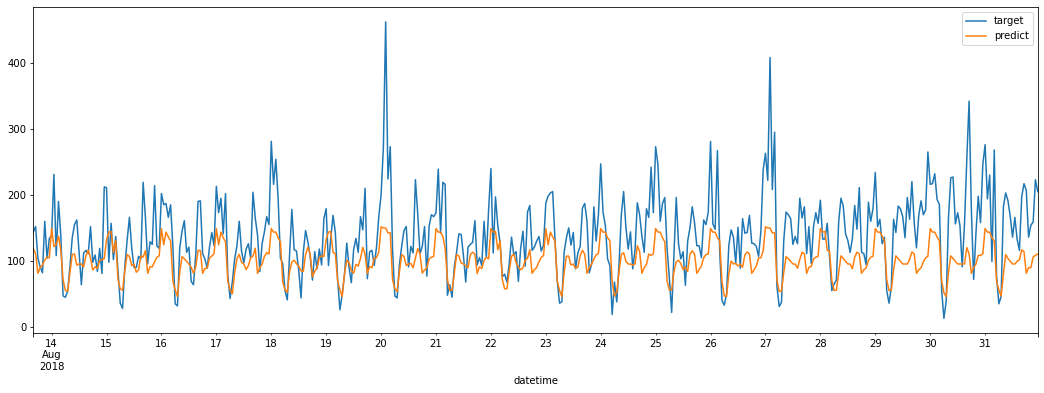

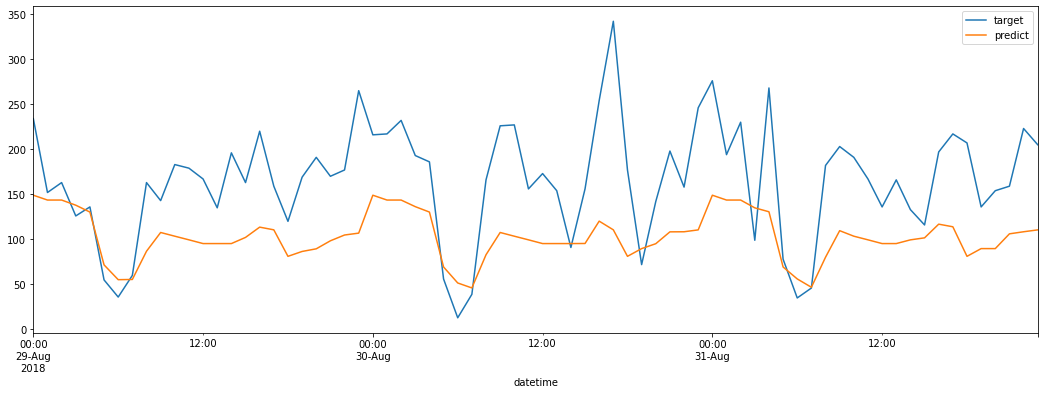

In [59]:
# строим сравнительный график "целевой признак - предсказание модели" для lg_model_predictions
graphicaizer(lg_model_predictions)

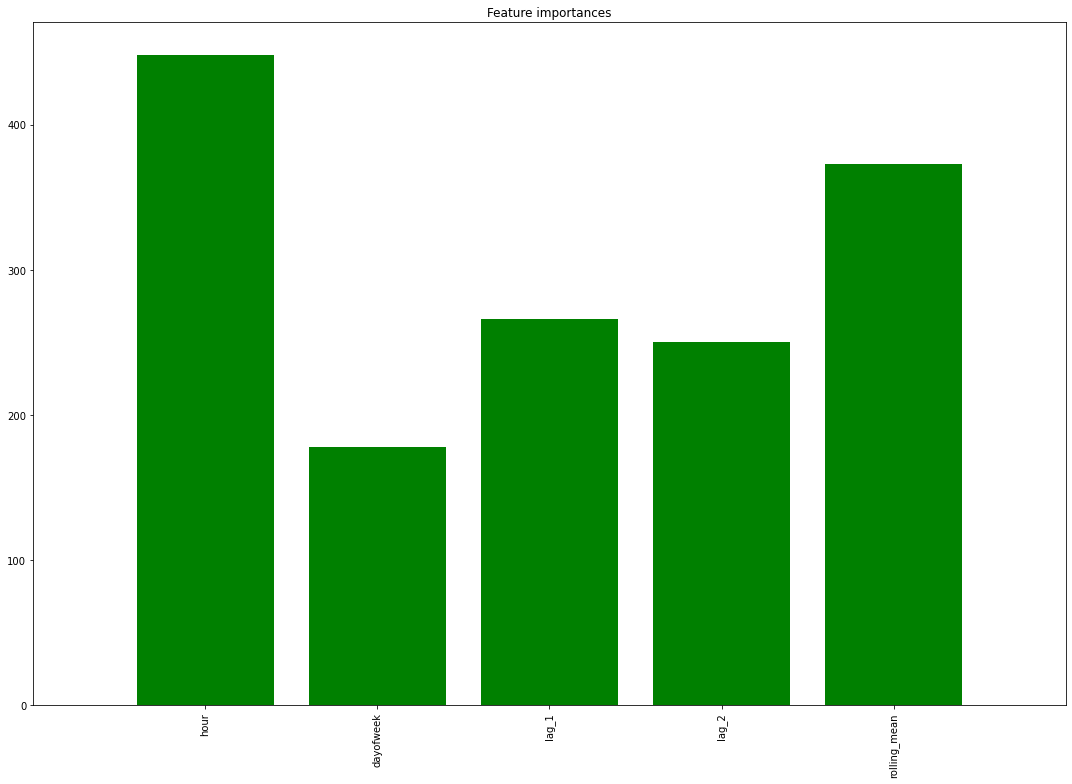

In [60]:
# график важности признаков модели lg_model
feature_importance_hist(lg_model, features_train)

`Test`__CatBoostRegressor___<br>

In [61]:
%%time
import catboost as cb # Импорт CatBoost
#Обучим модель на оптимальных гиперпараметрах
cb_model = cb.CatBoostRegressor(learning_rate=cb_params['learning_rate'],
                                depth=cb_params['depth'])

cb_model.fit(features_train, target_train, verbose=10)
cb_model_predictions = cb_model.predict(features_test)

#Определяю метрику RMSE
cb_RMSE = round(RMSE(target_test, cb_model_predictions), 3)
print('RMSE модели CatBoostRegressor:', cb_RMSE)

0:	learn: 35.8670924	total: 6.84ms	remaining: 6.83s
10:	learn: 25.0710138	total: 56.3ms	remaining: 5.06s
20:	learn: 22.9361655	total: 106ms	remaining: 4.92s
30:	learn: 22.0743475	total: 151ms	remaining: 4.71s
40:	learn: 20.9443595	total: 200ms	remaining: 4.68s
50:	learn: 20.3144516	total: 254ms	remaining: 4.73s
60:	learn: 19.5138676	total: 302ms	remaining: 4.64s
70:	learn: 19.1816080	total: 342ms	remaining: 4.47s
80:	learn: 18.7107886	total: 403ms	remaining: 4.58s
90:	learn: 18.3692797	total: 457ms	remaining: 4.57s
100:	learn: 18.0243373	total: 506ms	remaining: 4.5s
110:	learn: 17.6802703	total: 556ms	remaining: 4.45s
120:	learn: 17.2684054	total: 607ms	remaining: 4.41s
130:	learn: 16.9655821	total: 673ms	remaining: 4.46s
140:	learn: 16.6704462	total: 730ms	remaining: 4.45s
150:	learn: 16.3855823	total: 783ms	remaining: 4.4s
160:	learn: 16.0819797	total: 840ms	remaining: 4.38s
170:	learn: 15.8475592	total: 897ms	remaining: 4.35s
180:	learn: 15.6442695	total: 948ms	remaining: 4.29s
190:

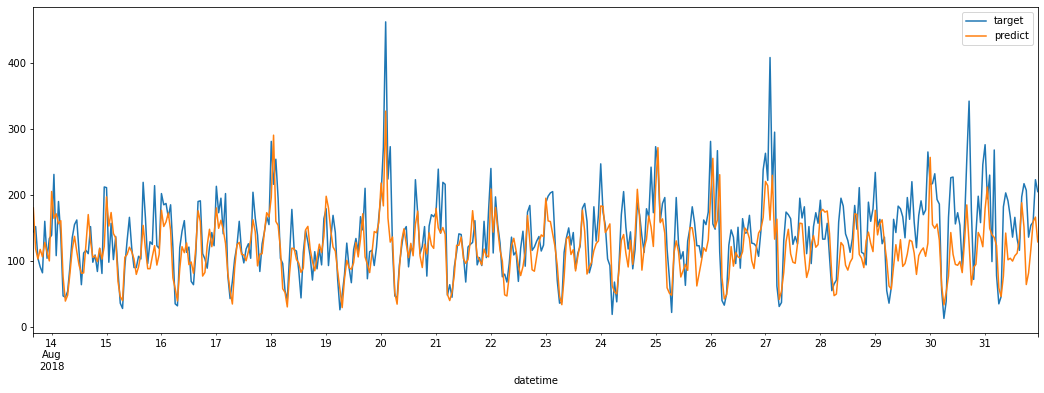

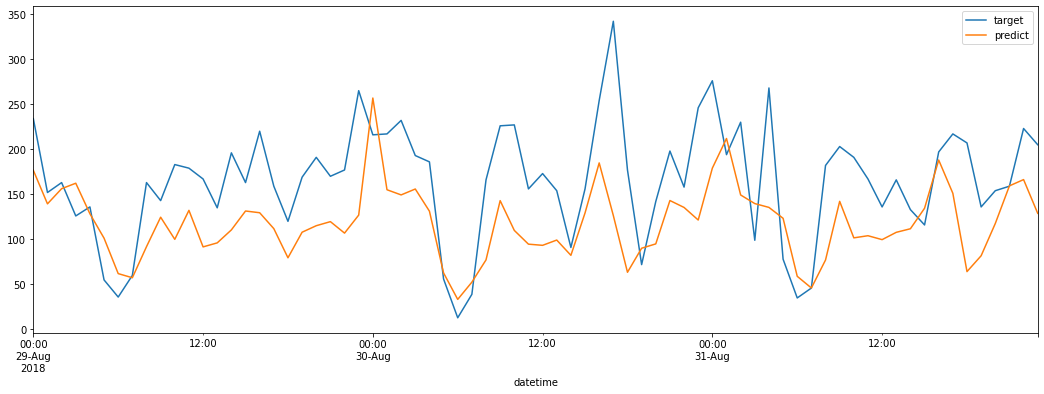

In [62]:
# строим сравнительный график "целевой признак - предсказание модели" для cb_model_predictions
graphicaizer(cb_model_predictions)

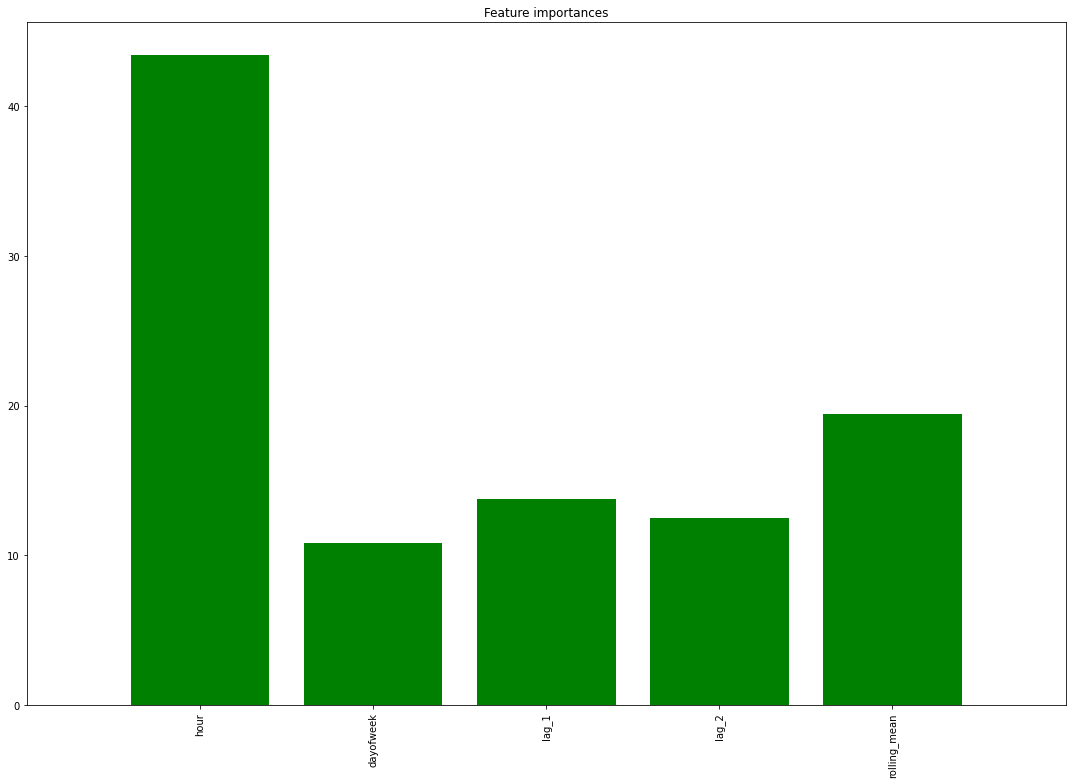

In [63]:
# график важности признаков модели cb_model
feature_importance_hist(cb_model, features_train)

Наилучшей метрики __RMSE__ удалось достичь при тестировании  модели __Линейной регрессии__. Проверим на адекватность. Сравним качество   созданных моделей с константной.

In [64]:
%%time
pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]
const_RMSE = round(RMSE(target_test, pred_previous), 3)
print('RMSE для проверки модели на адекватность:',const_RMSE)

RMSE для проверки модели на адекватность: 58.882
Wall time: 5.98 ms


In [70]:
columns = ['Алгоритм Модели','Время тестирования',  'RMSE - test',' ']

line = ['Линейная регрессия',' 4.99 ms', regression_RMSE,'заказов/час']

forest = ['Случайный лес','68.9 ms', forest_RMSE,'заказов/час']

LGBMRegressor = ['LGBMRegressor','68.6 ms',lg_RMSE,'заказов/час']

CatBoostRegressor = ['CatBoostRegressor','6.31 s', cb_RMSE,'заказов/час']

Constant_model = ['Constant model','5.98 ms', const_RMSE,'заказов/час']

table_result_test = pd.DataFrame([line, forest, LGBMRegressor, CatBoostRegressor, Constant_model], columns = columns)

table_result_test['Качество > Constant model, %'] =  round((1-table_result_test['RMSE - test']/const_RMSE) * 100, 2)
display(table_result_test)

,Алгоритм Модели,Время тестирования,RMSE - test,,"Качество > Constant model, %"
0,Линейная регрессия,4.99 ms,51.30,заказов/час,12.88
1,Случайный лес,68.9 ms,52.05,заказов/час,11.61
2,LGBMRegressor,68.6 ms,58.10,заказов/час,1.32
3,CatBoostRegressor,6.31 s,46.52,заказов/час,20.99
4,Constant model,5.98 ms,58.88,заказов/час,0.00


<div style="border:solid green 2px; padding: 20px">
    

На этапе тестирования моделей с подобранными гиперпараметрами. На начальном этапе объявили 2 функции: 
- __graphicaizer__ -  функция для построения сравнительных графиков "целевой признак - предсказание модели" 
- __feature_importance_hist__  - функция для построения графика важности признаков<br>
    
Было произведено тестирование моделей (`Линейная регрессия, Случайный лес, LGBMRegressor, CatBoostRegressor`), для проверки на адекватность, создана константная модель __const_RMSE__<br>
Каждой тестируемой модели - удалось достичь требуемого показателя метрики __RMSE__. Анализ сравнительных графиков в двух масштабах, показал, что модели хуже всего справляются с предсказаниями на высоких пиках и на провалах, но в целом, угадывают направления движения. Наилучший показатель в данном случае у __Линейная регрессия__, он равен __35.11__ заказов в час.

    
   
</div>

<a id='step11'></a>

## Общий вывод
[&#10224;](#step1)

In [71]:
# методом merge объединякм таблицы  table_result и table_result_test  
table = table_result.merge(table_result_test, on='Алгоритм Модели', how='right').fillna(0)
table

,Алгоритм Модели,Время обучения,RMSE - train,,Время тестирования,RMSE - test,,"Качество > Constant model, %"
0,Линейная регрессия,31.2 ms,32.80,заказов/час,4.99 ms,51.30,заказов/час,12.88
1,Случайный лес,2.75 s,24.20,заказов/час,68.9 ms,52.05,заказов/час,11.61
2,LGBMRegressor,5.25 s,23.28,заказов/час,68.6 ms,58.10,заказов/час,1.32
3,CatBoostRegressor,1min 40s,18.08,заказов/час,6.31 s,46.52,заказов/час,20.99
4,Constant model,0,0.00,0,5.98 ms,58.88,заказов/час,0.00



 <div style="border:solid green 2px; padding: 20px">
    
 
    

 Была __поставлена задача__,  на исторических данных  о заказах такси  в аэропортах, имеющихся у компании __«Чётенькое такси»__, с целью привлечения __большего количества водителей__, в период __пиковой нагрузки__, создать модель прогнозирующую количество заказов на __следующий час__. Главным условием в поставленной задаче - __RMSE__ созданной модели, на __тестовой выборке__, не должно превышать  __48__. Для выполнения  задания, были предоставленны данные в виде таблицы - `/datasets/taxi.csv.` — исходный датасет.
    
    
    
    
- На этапе __Предобработки__, было определено, что табличные данные  состояли из **1,** столбца (__признака__)  и **26496** строк(__объектов наблюдения__). В созданном датасете __df__, после предварительного ознакомления,  произвели предобработку в виде  индексации по  столбцу __datateme__ использовав аргумент для  read_csv __parse_dates=[0]___. Также при помощи  __index_col=0_  убрали столбец с первоначальной индексацией. Было решено убрать количество заказов большее 40 за 10 минут.<br>
    
    

- На следующем шаге __Анализ__ произвели ресемплирование  __datetime__ по одному часу. Для анализа на наличие тренда и сезонности выполнили декомпозицию методом __seasonal_decompose()__. сделали временные срезы данных.  
  Здесь определили, что количество заказов такси за один час, сильно зависит, как от времени суток, ночь существенно уступает дневному количеству заказов, так и от дня недели, __пятница-воскресенье__ более __продуктивны по заказам__, чем будничные дни.
После ресемплирование __datetime__ по __одному__ часу, был получен __df__ состоящий из __4416__ строк и __1__ столбца      
  Было обращено внимание на то, что полученная выборка отражает только теплый период времени года, март-август, что не дает объективно оценить, как годовую сезонность, так и подтвердить годовые успехи  компании __«Чётенькое такси»__  через наблюдаемый рост, в продвижении своих услуг. Образовавшийся возрастающий тренд увеличения заказа услуг такси, было решено объяснить тем, что в теплый период времени люди предпочитают брать отпуска и  больше путешествуют. С наступлением холодо осень-зима картина, по количеству заказов такси, может существенно измениться в сторону спада.
        
    
    
- Перед  __Обучение моделей__ создали функцию ___make_features___ через которую добавили дополнительные признаки в датасет __df__. Объявили функцию __RMSE__ для расчета  одноименной метрики RMSE. Создали __тестовую выборку__ размером __10%__ от исходных данных.<br> 
    Обучили 4-е модели (`Линейная регрессия, Случайный лес, LGBMRegressor, CatBoostRegressor`) на тренировочной выборке. Здесь, лучшую метрику __RMSE__ показала модель __CatBoostRegressor__  и составила __18.08__	заказов/час   
 

    
    
- Этапом __тестирования моделей__ с подобранными гиперпараметрами подошли к завершению выполнения прокта. Здесь создали функции  __graphicaizer__ -  функция для построения сравнительных графиков "целевой признак - предсказание модели" и
 __feature_importance_hist__  - функция для построения графика важности признаков<br>
Произвели тестирование моделей (`Линейная регрессия, Случайный лес, LGBMRegressor, CatBoostRegressor`), для проверки на адекватность, создана константная модель __const_RMSE__<br>
Всем тестируемым моделям удалось достичь требуемого показателя метрики __RMSE__. Анализ  графиков в разных масштабах, показал, что модели хуже всего справляются с предсказаниями на высоких пиках и на провалах, но в целом, угадывают направления движения. Наилучший показатель в данном случае у __CatBoostRegressor__, он равен __46.52__ заказов в час.
      
    
    
- C разной долей вероятности, результаты проверки моделей на  __тестовой выборке__ подтверждают __работостособность__ моделей по определению  предсказанию количества заказов такси на следующий час.  
    
    
Руководству компании `«Чётенькое такси»` для __прогнозирования количества заказов на следующий час, с целью  привлечения большего количества водителей, в период пиковой нагрузки__,  можно рекомендовать  - модель `CatBoostRegressor` 
    
 
 
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Илья, с модельной частью тебе удалось справиться хорошо!<br>
Видно, что этот скил уже достаточно сильный. А оформление отчёта - вне конкуренции!!!<br>

И если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие рассуждения, чтобы как-то раскрыть её особенности.<br>
        
Оставил несколько комментариев в тексте - готов буду ответить на твои вопросы!<br> 
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ</div> 

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b><br>
    Понятно, здесь информация на острие. Ничего удалять нельзя, а для стоящего предсказания, внимательно следить за поведение признаков в неразрывной связке со временем.

</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
Верно сказано: связь со временем и что было сделано в конкретные периоды времени

<a id='step12'></a>

## Чек-лист проверки
[&#10224;](#step1)

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48

In [67]:
import winsound # Звуковое оповещение о заверщении выполнения предыдущих ячеек кода
duration = 1000 # миллисекунды
freq = 440 # Гц
winsound.Beep(freq, duration)

In [68]:
end = time.time()
exec_time(start,end) # вызываем функцию определения времени работы Jupyter Notebook

Время выполнения кода: 00:02:07


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Хотел бы оставить несколько идей для твоих будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.</div> 

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b><br>
 Да, необходимо как-то в реальное применение этих знаний вникать, а то проделываемая работа не понятна до конца, просто  манипуляция с изученными инструментами, а реальная суть до конца не ясна. Про волшебную палочку уже понял, а заодно и то, что при решении конкретной задачи, необходимо быть глубоко в теме предмета прогнозирования, суметь  понять экспертов еще больше погруженных в тему! И чтобы смастерить более менее стоящее решение по прогнозированию с высокой точностью, необходимо проделать колоссальную работу по подбору и оттачиванию признаков.   

</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
ДА, это и имелл ввиду: Без понимания сути бизнеса - сложно найти хорошую модель!!!!!<br>
<br>
Если будет возможность тебе однозначно интересно посмотреть разные практические истории вот здесь:<br>
1 )https://ibf.org/knowledge - заморский институт бизнес-прогнозирования.<br>
Там и статьи можно накопать, и методы посмомтерть...<br>

2) Есть классический труд (он НЕ ML, а исключительно на эксель). Но для понимания сути временных рядов - то, что надо:<br>
УИЧЕРН "Бизнес-прогнозирование"<br>

3) Идеологически по системе прогнозирования, интересно почитать<br>
ТОМАС УОЛЛАС, Р. СТАЛЬ "планирование продаж и операций" SO&P<br><br>     

Спасибо, Илья, за проект и за открытость к диалогу)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБЧЕНИЯ!</div>

#    <br>[**В начало**](#step1)